# Final Project Submission

* Student name: Natalia Quintero
* Student pace: Full time
* Scheduled project review date/time: TBD
* Instructor name: Rafael Carrasco
* Blog post URL: TBD


-----------

## Methodology

### OSEMN

<b>Obtain</b> Gather information, obtain the data.

<b>Scrub</b> Clean, reduce noise, remove data that is not needed; check, remove or replace missing or null values, extract columns or format data types.

<b>Explore</b> Set up the data, check for multicollinearity, make sure the dataset meets what is neccessary for the type of model to aply later on.

<b>Model</b> Implement classification algorithm, tune parameters and adjust the the ones you have to try and increase accuracy in the results.

<b>Interpret</b> Draw conclussions, evaluate the results.

## Data Set 
The Census Income is a popular data set used for classification in Machine Learning, it's used to classify a person's income in two groups based on census data. The groups are people who earn more than 50,000/year, and those who earn less than 50,000/year. The data set contains 14 attirbutes and 48,842 instances.

## Data Acquisition

This data set was extracted by Barry Becker from the 1994 Census database, the data set can be found at UCI as Census Income Data Set (a.k.a Adult data set). The contents will be downloaded from the website a converted into dataframes for further exploration.

In [8]:
import pandas as pd
import numpy as np
import io
import requests
import os

import warnings
warnings.filterwarnings('ignore')

In [13]:
#template - download url and save it in a local directory

def downloadSet(path, url):
    if not os.path.exists(path):
        os.mkdir(path)

    for i in url_list:
        data = requests.get(i).content
        filename = os.path.join(path, os.path.basename(i))
        with open(filename, "wb") as file:
            file.write(data)

In [14]:
# Load dataset to local env

url_list = ['http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
        'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ]

downloadSet('data', url_list)

### Observations
By looking at the file, both sets don't have column names, there are white spaces in between values, and the first row in the test set file is a text column. 

In [21]:
# Add column names from Attribute information list

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [141]:
data = pd.read_csv('data/adult.data', names=columns, sep=' *, *', engine='python')
test = pd.read_csv('data/adult.test', names=columns, skiprows=1, sep=' *, *', engine='python')

In [143]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Concatenate both test and training set

In [144]:
#Dataframe concatenation

data_full = pd.concat([data, test])
data_full.shape

(48842, 15)

In [80]:
data_full.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


-----------

## Cleaning 

* Missing values / nan
* Correlation of features
* Class imbalance
* Scale
* Treat categorical columns

In [37]:
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [81]:
#check data types
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [82]:
# Check for null values

data_full.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

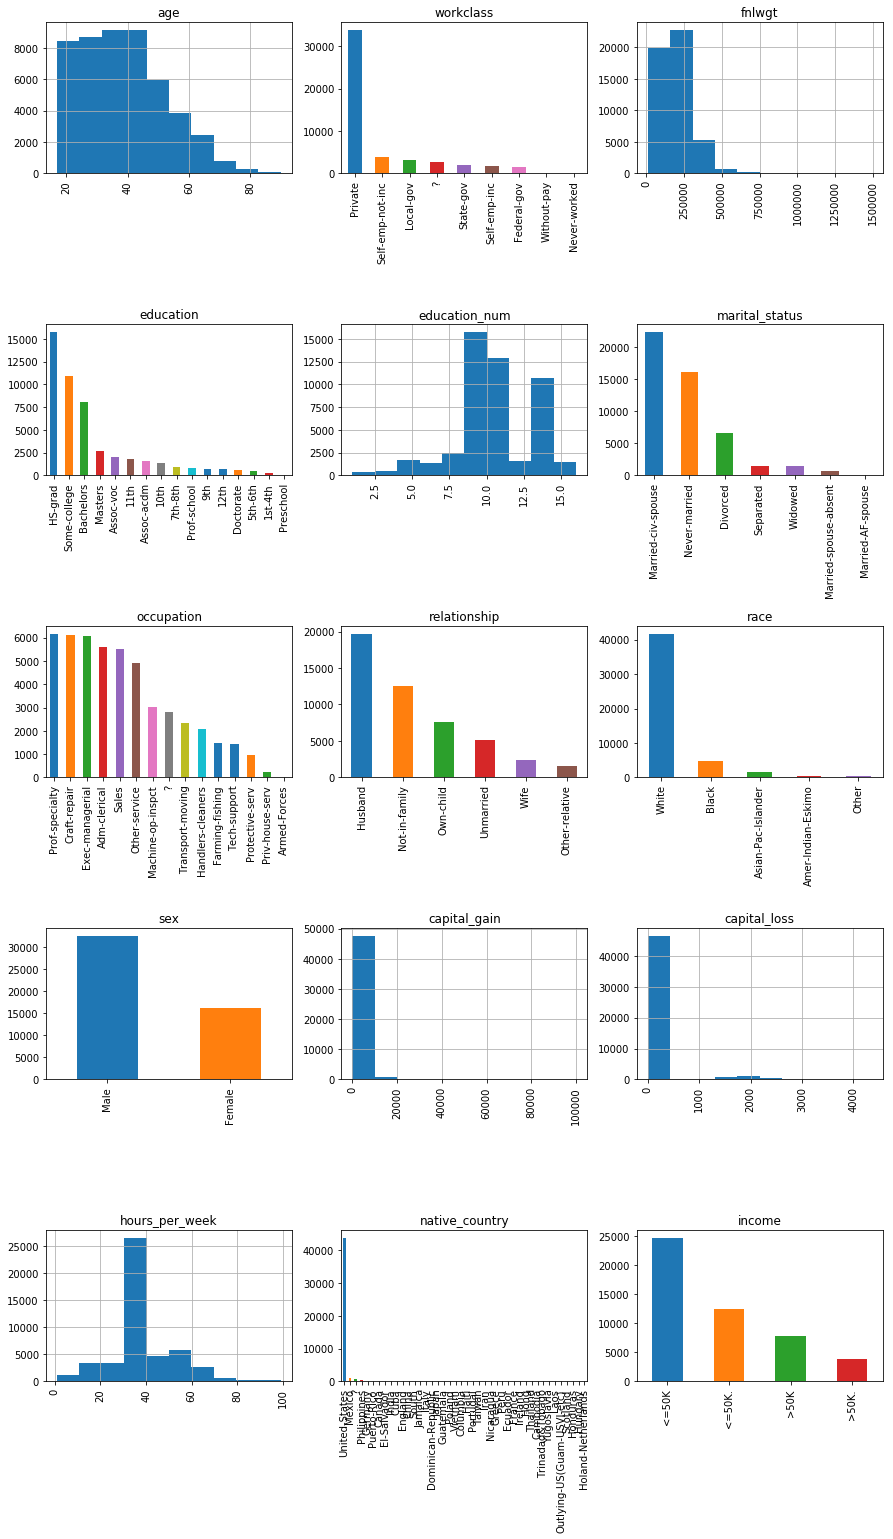

In [145]:
# Check overall distribution of features

fig = plt.figure(figsize=(15,25))
cols = 3
rows = math.ceil(float(data_full.shape[1])/cols)

for i, column in enumerate(data_full.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_full.dtypes[column] == np.object:
        data_full[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_full[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=1.0, wspace=0.2)

### Observations
* There are placeholders in two of the categorical features
* The income feature needs to be consolidated

In [148]:
#Remove placeholders

data_full.drop(data_full[data_full.workclass == '?'].index, inplace=True)
data_full.drop(data_full[data_full.occupation == '?'].index, inplace=True)

In [149]:
# New shape of the data frame

data_full.shape

(44244, 15)

In [151]:
# Income feature - remove the dots (from the test set)

data_full.loc[data_full['income'] == '<=50K.', 'income'] = '<=50K'
data_full.loc[data_full['income'] == '>50K.', 'income'] = '>50K'

<=50K    33246
>50K      7429
>50K.     3569
Name: income, dtype: int64

In [152]:
data_full['income'].value_counts()

<=50K    33246
>50K     10998
Name: income, dtype: int64

### Categorical features

Perform label encoding.

In [156]:
from sklearn import preprocessing

In [157]:
#Function to label encode categories in a Dataframe

def encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [158]:
df_encoded, _ = encode_features(data_full)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,39,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,39,0


Now, check again the distribution:

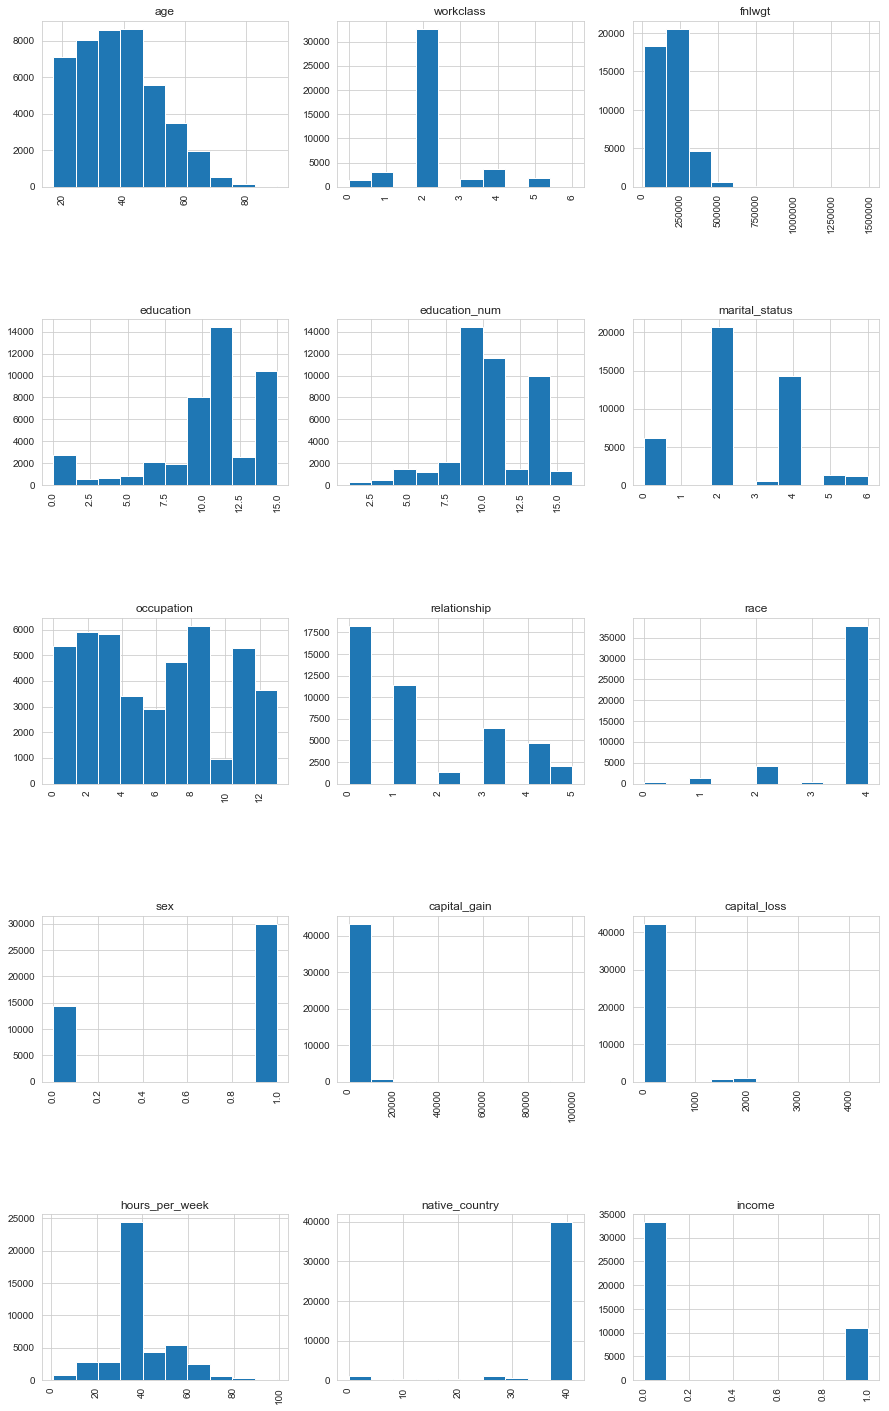

In [174]:
fig = plt.figure(figsize=(15,25))
cols = 3
rows = math.ceil(float(df_encoded.shape[1])/cols)

for i, column in enumerate(df_encoded.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_encoded.dtypes[column] == np.object:
        df_encoded[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_encoded[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.8, wspace=0.2)

------------

## Exploration

* Analyse decsriptive statistics
* Correlation of features
* Define target variable and features
* Normalization - if needed

### Descriptive Statistics

In [161]:
df_encoded.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,44244.000000,44244.000000,4.424400e+04,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000
mean,38.542198,2.204841,1.898261e+05,10.309737,10.126209,2.584599,5.982122,1.412033,3.670961,0.676679,1104.956989,88.840860,40.952604,36.736959,0.248576
std,13.196844,0.956298,1.054937e+05,3.817887,2.562031,1.496905,4.021771,1.598308,0.843357,0.467749,7532.416480,405.051437,12.001269,7.793194,0.432192
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176060e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,2.000000,1.783840e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,2.000000,2.377290e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### Observations
As seen on the description above, there are different numerical ranges for the features, so this set will need to be scaled later for modeling.

### Correlation of features

In [84]:
import seaborn as sns

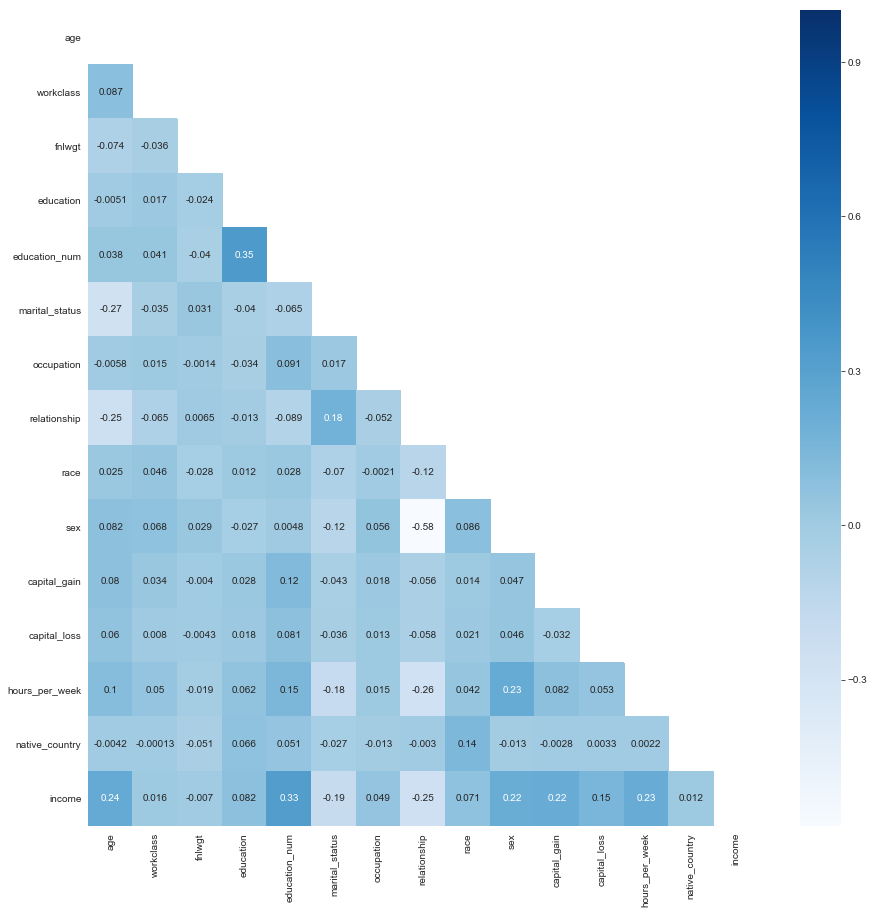

In [173]:
#Correlation of features

#Compute the correlation matrix for the dataset
corr = df_encoded.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f, ax=plt.subplots(figsize=(15,15))

#Generate heat map
sns.heatmap(corr, cmap="Blues", annot=True, mask=mask);

#### Observations

* Highest correlation (compared with other correlation values in this case) between education and education_num features; this can also be observed in the descriptive statistics, the mean and standars deviation values are very close to each other; one of them can be removed.

In [184]:
df_encoded.drop(['education_num'], axis=1, inplace=True)

In [185]:
df_encoded.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,39,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,39,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,39,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,39,0
5,37,2,284582,12,2,3,5,4,0,0,0,40,39,0


### Normalization

Before normalizing the dataset we need to define X and y in order to model wheteher or not a person's income exceeds 50K a year.

When training a machine learning model is important to normalize in order to prevent certain features from dominating or biasing the training.

In [186]:
# Define X and y

X = df_encoded[df_encoded.columns[:-1]]   #since the last column is the target, we don't include it in the partitiion
y = df_encoded.income                     #target column

In [187]:
#check shape of the two partitions

print(X.shape)
print(y.shape)

(44244, 13)
(44244,)


In [188]:
# Normalize

for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col]));

X.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.833333,0.043350,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95122
1,0.452055,0.666667,0.047274,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95122
2,0.287671,0.333333,0.136877,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95122
3,0.493151,0.333333,0.149792,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95122
5,0.273973,0.333333,0.183552,0.800000,0.333333,0.230769,1.0,1.0,0.0,0.00000,0.0,0.397959,0.95122


In [ ]:
plt.hist(X)

KeyboardInterrupt: 

## Analysis

## Interpretation

# Sources

* Bog data pipeline http://valsoftservices.com/big-data-implementation/

* Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.  http://archive.ics.uci.edu/ml/datasets/Census+Income

* Computing Community Consortium Big Data Whitepaper https://cra.org/ccc/